# GRIP : THE SPARK FOUNDATION

## Data Science and Business Analytics Intern

## Name : Akshay Kadam

## Task : Prediction Using Supervised ML 

#### Link to dataset : http://bit.ly/w-data

##### In this task we have to predict the percentage score of student based on the number of hours studied.The task has two variables where feature is the number of hours studied and the target value is the percentage score.This can be solved using simple linear regression.

import reqired libraries

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Reading data from remote url

In [2]:
df=pd.read_csv('http://bit.ly/w-data')

Exploring data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe(percentiles=[.25,.40,0.50,.60,0.70,0.75,.80,.90,.95])

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
40%,3.680000,38.600000
50%,4.800000,47.000000
60%,5.660000,60.800000
70%,6.740000,68.600000
75%,7.400000,75.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

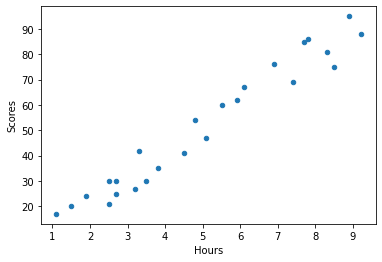

In [8]:
df.plot(kind='scatter',x='Hours',y='Scores')

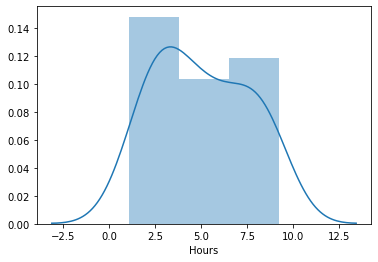

In [9]:
sns.distplot(df['Hours'])

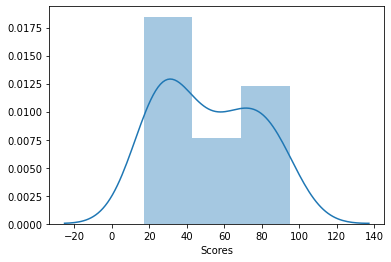

In [10]:
sns.distplot(df['Scores'])

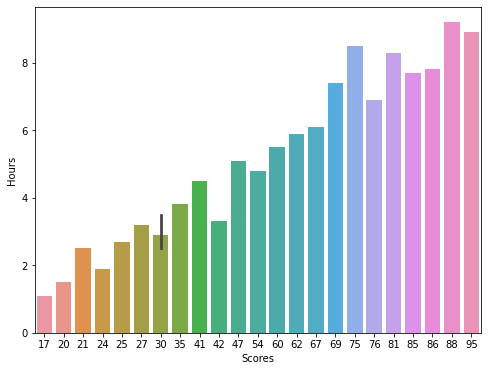

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Scores'],y=df['Hours'])

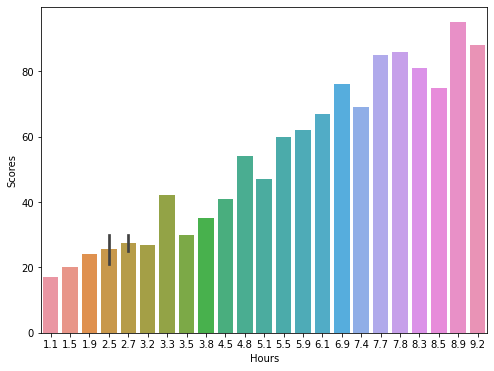

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Hours'],y=df['Scores'])

### Linear Regression

In [73]:
X=df['Hours']

In [51]:
y=df['Scores']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=50)

In [54]:
import statsmodels.api as sm

In [55]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [56]:
lr.params

const    2.810236
x1       9.595636
dtype: float64

In [57]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     305.8
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           9.64e-13
Time:                        20:13:07   Log-Likelihood:                -62.514
No. Observations:                  20   AIC:                             129.0
Df Residuals:                      18   BIC:                             131.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8102      3.083      0.912      0.374      -3.666       9.287
x1             9.5956      0.549     17.488      0.000       8.443      10.748
==============================================================================
Omnibus:                        5.852   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                1.642
Skew:                           0.028   Prob(JB):                        0.440
Kurtosis:                       1.597   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#y=mx+c
m=9.5956
c=2.8102

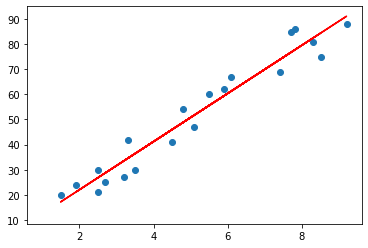

In [59]:
plt.scatter(X_train,y_train)
plt.plot(X_train_sm,2.8102+ 9.5956*X_train_sm,'r')
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
reg=LinearRegression()

In [62]:
reg.fit(X_train,y_train)

LinearRegression()

In [63]:
reg.coef_

array([9.59563563])

In [64]:
reg.intercept_

2.8102364628265804

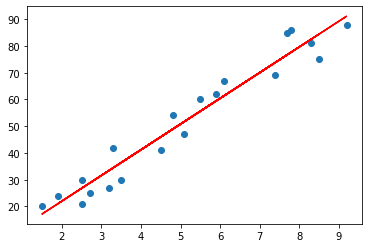

In [66]:
plt.scatter(X_train,y_train)
plt.plot(X_train,9.59563563*X_train + 2.8102364628265804 ,'r')
plt.show()

In [67]:
y_pred=reg.predict(X_test)

In [68]:
actual_predicted=pd.DataFrame({'Actual':y_test,'Predict':y_pred})
actual_predicted

,Actual,Predict
15,95,88.211394
20,30,28.718453
23,76,69.020122
22,35,39.273652
14,17,13.365436


### What would be predicted score if student studies for 9.25 hours/day?

In [71]:
hr=9.25
s=reg.predict([[hr]])
print('If student studies for {} hours per day then he/she will score {} % in exam.'.format(hr,s))

If student studies for 9.25 hours per day then he/she will score [91.56986604] % in exam.


### Model Evolution

In [70]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score: ',r2_score(y_test,y_pred))

Mean Absolute Error:  4.5916495300630285
R2 Score:  0.971014141329942
